# <span style ='color:#0A1172'>DHHS Chronic Disease Indicators: Cancer Prevalance Analysis
## <span style ='color:#59788E'> <bu>EXPLORATORY NOTEBOOK</bu>

- <span style ='color:#016064'>by Annie Carter
- <span style ='color:#016064'>Sourced by U.S. Department of Health & Human Services

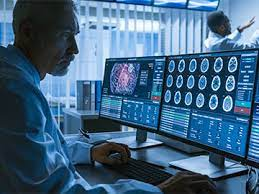

 Custom Palette = Navy #0A1172, Stone #59788E, Ocean #757C88, Berry #241571

In [1]:
#IMPORT LIBRARIES
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import os
import folium

# import Machine Learning Library for classification
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
import datetime


## <span style ='color:#241571'>ACQUIRE

In [2]:
# Save and read dataset csv from https://catalog.data.gov/dataset/u-s-chronic-disease-indicators-cdi
df = pd.read_csv('U.S._Chronic_Disease_Indicators__CDI_.csv')

/var/folders/0f/gkm6knzn3fscjt7dxlgc9k5h0000gn/T/ipykernel_77713/2347781156.py:2: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('U.S._Chronic_Disease_Indicators__CDI_.csv')


In [3]:
# Review shape to determine processing needs, will use sample size due to network restrictions for exploration
df.shape

(1185676, 34)

In [4]:
#Review data to look at columns datatypes and nulls
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1185676 entries, 0 to 1185675
Data columns (total 34 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   YearStart                  1185676 non-null  int64  
 1   YearEnd                    1185676 non-null  int64  
 2   LocationAbbr               1185676 non-null  object 
 3   LocationDesc               1185676 non-null  object 
 4   DataSource                 1185676 non-null  object 
 5   Topic                      1185676 non-null  object 
 6   Question                   1185676 non-null  object 
 7   Response                   0 non-null        float64
 8   DataValueUnit              1033553 non-null  object 
 9   DataValueType              1185676 non-null  object 
 10  DataValue                  806942 non-null   object 
 11  DataValueAlt               804578 non-null   float64
 12  DataValueFootnoteSymbol    393710 non-null   object 
 13  DatavalueFoo

In [5]:
# Quick review of data in columns started with 40 then transpose for readiability with head of 5
df.head().T

,0,1,2,3,4
YearStart,2014,2018,2018,2017,2010
YearEnd,2014,2018,2018,2017,2010
LocationAbbr,AR,CO,DC,GA,MI
LocationDesc,Arkansas,Colorado,District of Columbia,Georgia,Michigan
DataSource,SEDD; SID,SEDD; SID,SEDD; SID,SEDD; SID,SEDD; SID
Topic,Asthma,Asthma,Asthma,Asthma,Asthma
Question,Hospitalizations for asthma,Hospitalizations for asthma,Hospitalizations for asthma,Hospitalizations for asthma,Hospitalizations for asthma
Response,NaN,NaN,NaN,NaN,NaN
DataValueUnit,NaN,NaN,NaN,NaN,NaN
DataValueType,Number,Number,Number,Number,Number


In [6]:
filtered_df = df.loc[(df['Topic'] == 'Cancer') & (df['Question'].notnull())]
filtered_unique_counts = filtered_df['Question'].value_counts()
print(filtered_unique_counts)


Cancer of the oral cavity and pharynx, mortality                                        9984
Invasive cancer of the oral cavity or pharynx, incidence                                9984
Cancer of the lung and bronchus, incidence                                              9984
Cancer of the colon and rectum (colorectal), incidence                                  9984
Invasive cancer of the cervix, incidence                                                9984
Invasive cancer of the female breast, incidence                                         9984
Invasive cancer (all sites combined), incidence                                         9984
Cancer of the prostate, mortality                                                       9984
Invasive cancer of the prostate, incidence                                              9984
Melanoma, mortality                                                                     9984
Invasive melanoma, incidence                                          

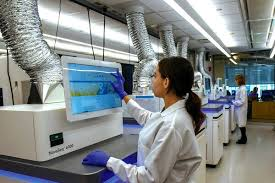

## <span style ='color:#241571'>PREPARE
Reduced sample dataframe to 100K to rapidly review and clean. 

In [7]:
#created sample DF with random state of 42 to review and clean data rapidly
df_sample= df.sample(n=1000000, random_state=42)


In [8]:
columns_to_remove = ['YearEnd', 'Response', 'StratificationCategory2', 'Stratification2', 'StratificationCategory3', 'DataValue',
                     'Stratification3', 'ResponseID', 'StratificationCategoryID2', 'StratificationID2',
                     'StratificationCategoryID3', 'StratificationID3','DataValueTypeID','QuestionID', 'TopicID','LocationID','HighConfidenceLimit','LowConfidenceLimit','YearEnd','LocationDesc','DataValueUnit','DataValueType','DataValueAlt','DataValueFootnoteSymbol','DatavalueFootnote','StratificationCategoryID1','StratificationID1','Question','DataSource']
# Drop unnecessary columns from the Dataframe
df_sample = df_sample.drop(columns_to_remove, axis=1)

In [9]:
df_sample.head()

,YearStart,LocationAbbr,Topic,StratificationCategory1,Stratification1,GeoLocation
392116,2017,NV,Cardiovascular Disease,Race/Ethnicity,"White, non-Hispanic",POINT (-117.07184056399967 39.493240390000494)
471795,2019,NC,"Nutrition, Physical Activity, and Weight Status",Race/Ethnicity,"Asian, non-Hispanic",POINT (-79.15925046299964 35.466220975000454)
580253,2012,AZ,Diabetes,Race/Ethnicity,Hispanic,POINT (-111.76381127699972 34.865970280000454)
1113792,2011,VA,Cardiovascular Disease,Race/Ethnicity,Hispanic,POINT (-78.45789046299967 37.54268067400045)
707447,2017,ID,Tobacco,Race/Ethnicity,Hispanic,POINT (-114.3637300419997 43.682630005000476)


In [10]:
 df_sample = df_sample.rename(columns={'YearStart':'Year', 'Stratification1':'Demographics','GeoLocation':'Geo Location', 'LocationAbbr' : 'State Abbr','Topic': 'Disease'})


In [11]:
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 392116 to 1103867
Data columns (total 6 columns):
 #   Column                   Non-Null Count    Dtype 
---  ------                   --------------    ----- 
 0   Year                     1000000 non-null  int64 
 1   State Abbr               1000000 non-null  object
 2   Disease                  1000000 non-null  object
 3   StratificationCategory1  1000000 non-null  object
 4   Demographics             1000000 non-null  object
 5   Geo Location             991383 non-null   object
dtypes: int64(1), object(5)
memory usage: 53.4+ MB


In [12]:
df_sample.Demographics.value_counts()

Overall                             140281
Hispanic                            124265
White, non-Hispanic                 124136
Black, non-Hispanic                 123729
Male                                118688
Female                              118600
Other, non-Hispanic                  71892
Multiracial, non-Hispanic            71729
American Indian or Alaska Native     53176
Asian or Pacific Islander            50733
Asian, non-Hispanic                   2771
Name: Demographics, dtype: int64

In [13]:
df_sample.shape

(1000000, 6)

In [14]:
#Sample size has a equal distribution by US State and terroritory Reviewed during initial exploration using .head(20)
df_sample['State Abbr'].value_counts().head(2)

WI    19067
NJ    19066
Name: State Abbr, dtype: int64

In [15]:
df_sample['Disease'].value_counts()

Cancer                                             148507
Cardiovascular Disease                             133143
Diabetes                                           132121
Chronic Obstructive Pulmonary Disease              128701
Asthma                                              67973
Arthritis                                           66000
Nutrition, Physical Activity, and Weight Status     63749
Overarching Conditions                              61937
Alcohol                                             55831
Tobacco                                             49934
Older Adults                                        22089
Chronic Kidney Disease                              20989
Oral Health                                         18798
Mental Health                                       11210
Immunization                                         7977
Reproductive Health                                  7707
Disability                                           3334
Name: Disease,

In [16]:
# List of values to remove from the 'Topic' column
values_to_remove = ['Asthma', 'Arthritis', 'Nutrition, Physical Activity, and Weight Status', 'Overarching Conditions','Alcohol','Tobacco','Chronic Kidney Disease','Older Adults','Oral Health','Mental Health','Immunization','Reproductive Health','Disability']

# Drop rows with specific values from the 'Topic' column
df_sample = df_sample.drop(df_sample[df_sample['Disease'].isin(values_to_remove)].index)

df_sample.Disease.value_counts()


Cancer                                   148507
Cardiovascular Disease                   133143
Diabetes                                 132121
Chronic Obstructive Pulmonary Disease    128701
Name: Disease, dtype: int64

In [17]:
# Will use Cancer to create one-hot code "dummy" value for prevalaence \n"Yes_cancer" and Cardiovascular Disease, Diabetes & COPD \n . I will remove other Topics reduce date to  
# Create a dummy variable for the 'Topic' column
df_sample['Yes_cancer'] = np.where(df_sample['Disease'] == 'Cancer', 1, 0).astype(int)

# Drop the original 'Topic' column
df_sample.drop('Disease', axis=1, inplace=True)

df_sample.head()

,Year,State Abbr,StratificationCategory1,Demographics,Geo Location,Yes_cancer
392116,2017,NV,Race/Ethnicity,"White, non-Hispanic",POINT (-117.07184056399967 39.493240390000494),0
580253,2012,AZ,Race/Ethnicity,Hispanic,POINT (-111.76381127699972 34.865970280000454),0
1113792,2011,VA,Race/Ethnicity,Hispanic,POINT (-78.45789046299967 37.54268067400045),0
1099178,2014,UT,Gender,Male,POINT (-111.58713063499971 39.360700171000474),0
145307,2008,AL,Gender,Male,POINT (-86.63186076199969 32.84057112200048),1


In [18]:
#Find nulls
df_sample.isnull().sum()

Year                          0
State Abbr                    0
StratificationCategory1       0
Demographics                  0
Geo Location               5065
Yes_cancer                    0
dtype: int64

In [19]:
df_sample.dropna(subset=['Geo Location',], inplace=True)

In [20]:
df_sample.isnull().sum()

Year                       0
State Abbr                 0
StratificationCategory1    0
Demographics               0
Geo Location               0
Yes_cancer                 0
dtype: int64

In [21]:
df_sample.shape

(537407, 6)

In [22]:
#Find duplicates
df_sample.duplicated().sum()

526066

In [23]:
#Instructed to remove DataValues which made rows more distinguisable must keep rows due to limited columns at this point because they are not true duplicates
# df_sample.drop_duplicates(inplace=True)

In [24]:
df_sample.head(2)

,Year,State Abbr,StratificationCategory1,Demographics,Geo Location,Yes_cancer
392116,2017,NV,Race/Ethnicity,"White, non-Hispanic",POINT (-117.07184056399967 39.493240390000494),0
580253,2012,AZ,Race/Ethnicity,Hispanic,POINT (-111.76381127699972 34.865970280000454),0


In [25]:
df_sample.shape

(537407, 6)

In [26]:
# Create a new column 'Race/Ethnicity' based on the condition
df_sample['Race/Ethnicity'] = np.where(df_sample.StratificationCategory1 == 'Race/Ethnicity', df_sample.Demographics, '')

df_sample.head(2)



,Year,State Abbr,StratificationCategory1,Demographics,Geo Location,Yes_cancer,Race/Ethnicity
392116,2017,NV,Race/Ethnicity,"White, non-Hispanic",POINT (-117.07184056399967 39.493240390000494),0,"White, non-Hispanic"
580253,2012,AZ,Race/Ethnicity,Hispanic,POINT (-111.76381127699972 34.865970280000454),0,Hispanic


In [27]:
# Create a new column 'Race/Ethnicity' based on the condition
df_sample['Gender'] = np.where(df_sample.StratificationCategory1 == 'Gender', df_sample.Demographics, '')

df_sample.head(2)


,Year,State Abbr,StratificationCategory1,Demographics,Geo Location,Yes_cancer,Race/Ethnicity,Gender
392116,2017,NV,Race/Ethnicity,"White, non-Hispanic",POINT (-117.07184056399967 39.493240390000494),0,"White, non-Hispanic",
580253,2012,AZ,Race/Ethnicity,Hispanic,POINT (-111.76381127699972 34.865970280000454),0,Hispanic,


In [109]:
# Will use Female to create one-hot code "dummy" value for "female" 
df_sample['Yes_female'] = np.where(df_sample['Gender'] == 'Female', 1, 0).astype(int)

# # Drop the original 'Topic' column
# df_sample.drop('Topic', axis=1, inplace=True)

df_sample.head(2)

,Year,State Abbr,StratificationCategory1,Demographics,Geo Location,Yes_cancer,Race/Ethnicity,Gender,Yes_female,Longitude,Latitude
392116,2017,NV,Race/Ethnicity,"White, non-Hispanic",POINT (-117.07184056399967 39.493240390000494),0,"White, non-Hispanic",,0,-117.071841,39.49324
580253,2012,AZ,Race/Ethnicity,Hispanic,POINT (-111.76381127699972 34.865970280000454),0,Hispanic,,0,-111.763811,34.86597


In [110]:
df_sample['Yes_female'].astype(int)

392116     0
580253     0
1113792    0
1099178    0
145307     0
          ..
763193     0
172328     0
658354     1
325170     1
1103867    0
Name: Yes_female, Length: 537407, dtype: int64

In [30]:
# # Replace blank spaces with -1
# # df_sample['Gender'] = df_sample['Gender'].str.strip().replace('', '-1')
# df_sample['Gender'] = df_sample['Gender'].str.strip().replace('NaN', '-1').astype(int)



In [111]:
# Get the value counts of 'Cancer' topic
male_value_counts = df_sample[df_sample['Demographics'] == 'Male']['Demographics'].value_counts()
male_value_counts 

Male    65385
Name: Demographics, dtype: int64

In [112]:
# Get the value counts of 'Cancer' topic
female_value_counts = df_sample[df_sample['Demographics'] == 'Female']['Demographics'].value_counts()
female_value_counts 

Female    65171
Name: Demographics, dtype: int64

In [113]:
df_sample.Yes_female.value_counts()

0    472236
1     65171
Name: Yes_female, dtype: int64

In [114]:
# Get the value counts of 'Cancer' topic in the 'Demographic' column
demographic_value_counts = df_sample['Demographics'].value_counts()
demographic_value_counts 


Overall                             69057
Hispanic                            67737
White, non-Hispanic                 67505
Black, non-Hispanic                 67437
Male                                65385
Female                              65171
Asian or Pacific Islander           39854
American Indian or Alaska Native    39743
Other, non-Hispanic                 27797
Multiracial, non-Hispanic           27721
Name: Demographics, dtype: int64

In [115]:
# Get the value counts of 'Cancer' topic in the 'Demographic' column
demographic_value_counts_with_cancer = df_sample[df_sample['Yes_cancer'] == 1]['Demographics'].value_counts()
demographic_value_counts_with_cancer

Hispanic                            18721
Overall                             18624
Black, non-Hispanic                 18597
White, non-Hispanic                 18562
Female                              17093
Male                                17004
American Indian or Alaska Native    16511
Asian or Pacific Islander           16462
Other, non-Hispanic                  2154
Multiracial, non-Hispanic            2144
Name: Demographics, dtype: int64

In [116]:
# Get the value counts of 'Cancer' topic
cancer_value_counts = df_sample['Yes_cancer'].value_counts()
cancer_value_counts

0    391535
1    145872
Name: Yes_cancer, dtype: int64

In [117]:
total_with_cancer = (df_sample['Yes_cancer'] == 1).sum()
total_with_cancer

145872

In [119]:
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 537407 entries, 392116 to 1103867
Data columns (total 11 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Year                     537407 non-null  int64  
 1   State Abbr               537407 non-null  object 
 2   StratificationCategory1  537407 non-null  object 
 3   Demographics             537407 non-null  object 
 4   Geo Location             537407 non-null  object 
 5   Yes_cancer               537407 non-null  int64  
 6   Race/Ethnicity           537407 non-null  object 
 7   Gender                   537407 non-null  object 
 8   Yes_female               537407 non-null  int64  
 9   Longitude                537407 non-null  float64
 10  Latitude                 537407 non-null  float64
dtypes: float64(2), int64(3), object(6)
memory usage: 49.2+ MB


In [40]:
# Extract latitude and longitude from 'Geo Location' column
df_sample[['Longitude', 'Latitude']] = df_sample['Geo Location'].str.extract(r'POINT \((-?\d+\.\d+) (-?\d+\.\d+)\)')

# # Convert the latitude and longitude values to float
# df['Longitude'] = df['Longitude'].astype(float)
# df['Latitude'] = df['Latitude'].astype(float)


In [41]:
# # Convert the latitude and longitude values to float
df_sample['Longitude'] = df_sample['Longitude'].astype(float)
df_sample['Latitude'] = df_sample['Latitude'].astype(float)

In [42]:


# def split_row_by_value(df_sample, column_name):
#     rows_to_concat = []
    
#     for idx, row in df_sample.iterrows():
#         value_to_split = row['Observations']
#         if isinstance(value_to_split, int) and value_to_split > 1:
#             new_rows = [row.copy() for _ in range(value_to_split - 1)]
#             new_values = range(1, value_to_split)
#             for i, value in enumerate(new_values):
#                 new_rows[i]['Observations'] = value
#             rows_to_concat.extend(new_rows)
    
#     expand_df = pd.concat([df_sample] + rows_to_concat, ignore_index=True)
#     return expand_df






In [43]:
# expand_df = split_row_by_value(df_sample, 'Data_Value')

In [44]:
# expand_df.head()

In [45]:
# expand_df = split_row_by_value(df_sample, 'DataValue')
# expand_df.info()

### <span style ='color:#016064'>PREPARATION SUMMARY
After starting with original dataset of 1M+ I reduced it to 100K to rapidly clean and prepare for MVP. The data appeared to be distrubuted equally between states and within the 4 chronic diseases selected overall. If 10675 is too small. I can revert to original dataset using the same preparation used on the 100K df_sample. 

In [46]:
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 537407 entries, 392116 to 1103867
Data columns (total 11 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Year                     537407 non-null  int64  
 1   State Abbr               537407 non-null  object 
 2   StratificationCategory1  537407 non-null  object 
 3   Demographics             537407 non-null  object 
 4   Geo Location             537407 non-null  object 
 5   Yes_cancer               537407 non-null  int64  
 6   Race/Ethnicity           537407 non-null  object 
 7   Gender                   537407 non-null  object 
 8   Yes_female               537407 non-null  int64  
 9   Longitude                537407 non-null  float64
 10  Latitude                 537407 non-null  float64
dtypes: float64(2), int64(3), object(6)
memory usage: 49.2+ MB


### <span style ='color:#016064'>PREPRATION FUNCTIONS FOR FINAL NOTEBOOK 

In [47]:
def prep_cdi(df):
    ''' 
     The below functions prepares DHSS CDI for Cancer prevalance analysis 
    '''
    # List of columns to remove from Dataframe. 
    columns_to_remove = ['YearEnd', 'Response', 'StratificationCategory2', 'Stratification2', 'StratificationCategory3',
                     'Stratification3', 'ResponseID', 'StratificationCategoryID2', 'StratificationID2',
                     'StratificationCategoryID3', 'StratificationID3','DataValueTypeID','QuestionID', 'TopicID','LocationID','HighConfidenceLimit','LowConfidenceLimit','YearEnd','LocationDesc','DataValueUnit','DataValueType','DataValueAlt','DataValueFootnoteSymbol','DatavalueFootnote','StratificationCategoryID1','StratificationID1','Question','DataSource']
    
        # Drop unnecessary columns from the Dataframe
    df_sample = df_sample.drop(columns_to_remove, axis=1)
    
    #change column names to be more readable
    df_sample = df_sample.rename(columns={'YearStart':'Year', 'Stratification1':'Demographics','GeoLocation':'Geo Location', 'LocationAbbr' : 'State Abbr','Topic': 'Disease'})


    
    # List of values to remove from the 'Topic' column
    values_to_remove = ['Asthma', 'Arthritis', 'Nutrition, Physical Activity, and Weight Status', 'Overarching Conditions','Alcohol','Tobacco','Chronic Kidney Disease','Older Adults','Oral Health','Mental Health','Immunization','Reproductive Health','Disability']
    # Drop rows with specific values from the 'Topic' column
    df_sample = df_sample.drop(df_sample[df_sample['Topic'].isin(values_to_remove)].index)
    
    #Remove nulls
    df_sample.dropna()
    # Remove duplicate rows from the original DataFrame 'df_sample'
    df_sample.drop_duplicates(inplace=True)
    

In [48]:
def race_gender(df):
    # Create a new column 'Race/Ethnicity' based on the condition
    df_sample['Race/Ethnicity'] = np.where(df_sample.StratificationCategory1 == 'Race/Ethnicity', df_sample.Demographics, '')
    # Create a new column 'Gender' based on the condition
    df_sample['Gender'] = np.where(df_sample.StratificationCategory1 == 'Gender', df_sample.Demographics, '')
    # Will use Female to create one-hot code "dummy" value for "female" if needed for classification models
    #df_sample['Yes_female'] = np.where(df_sample['Gender'] == 'Female', 1, 0).astype(int)
    

## <span style ='color:#241571'>INITIAL EXPLORE

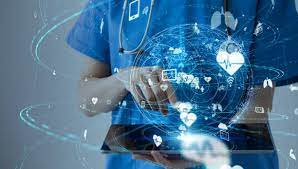

In [49]:
# # Apply the lambda function to check if the values in the 'Gender' column are blank
# is_blank = df_sample['Gender'].apply(lambda x: x.strip().isspace())

# # Count the number of blank values in the 'Gender' column
# num_blank_values = is_blank.sum()

# num_blank_values


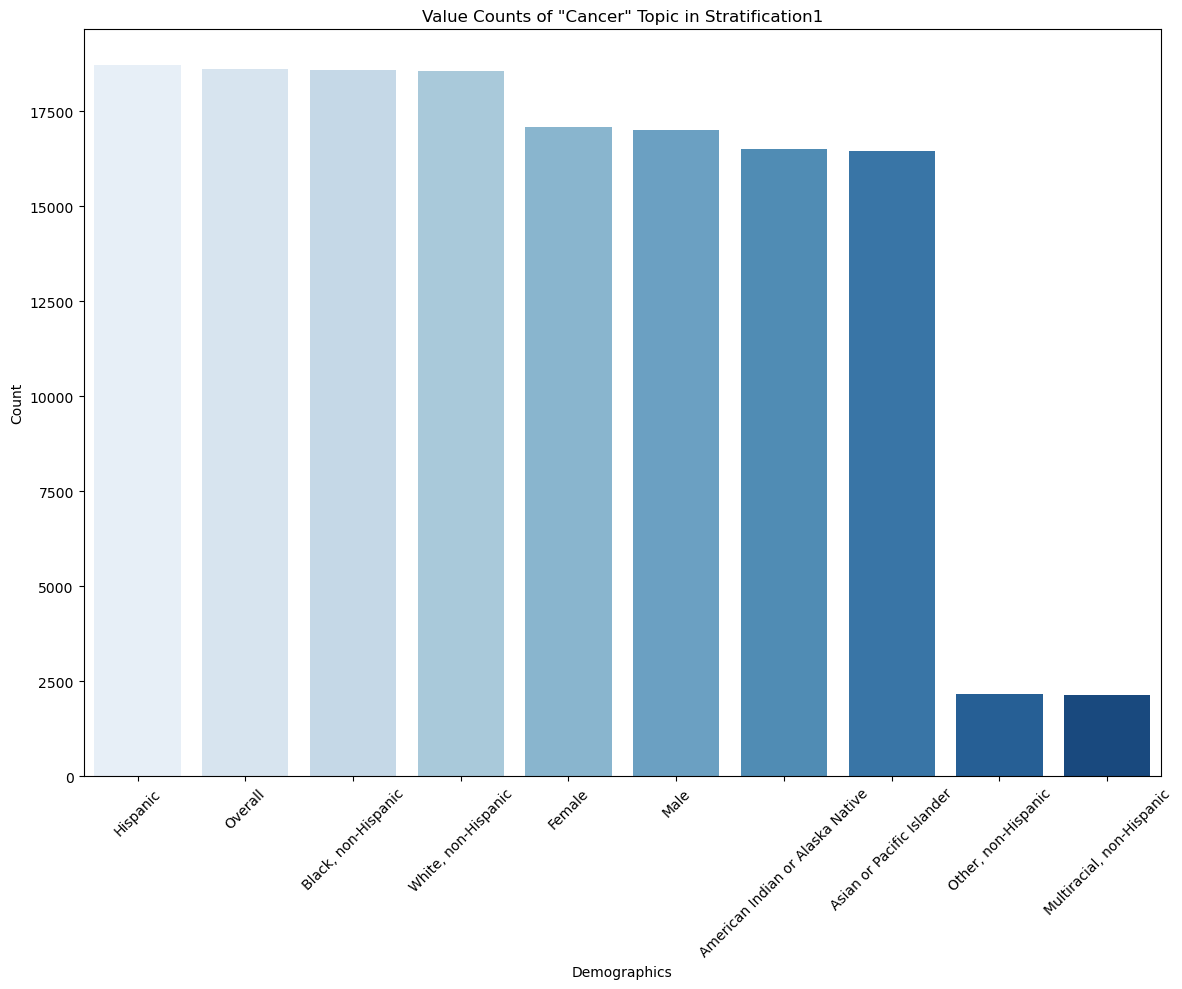

In [50]:
# Get the value counts of 'Cancer' topic in the 'Stratification1' column
demographic_value_counts_with_cancer = df_sample[df_sample['Yes_cancer'] == 1]['Demographics'].value_counts()

# Create a bar plot using Seaborn
plt.figure(figsize=(12, 10))
sns.barplot(x=demographic_value_counts_with_cancer.index, y=demographic_value_counts_with_cancer.values, palette='Blues')

# Set labels and title
plt.xlabel('Demographics')
plt.ylabel('Count')
plt.title('Value Counts of "Cancer" Topic in Stratification1')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()  
plt.show()


## <span style ='color:#241571'> DATA SPLIT

In [51]:
def split_sample(df):
    ''' The below functions were created in regression excercises and will be aggregated to make a master clean_data function for final 
        report
    '''
    train_validate, sample_test = train_test_split(df_sample, test_size=0.2, random_state=42)
    sample_train, sample_validate = train_test_split(train_validate, test_size=0.25, random_state=42)
    print(f'Train shape: {sample_train.shape}')
    print(f'Validate shape: {sample_validate.shape}')
    print(f'Test shape: {sample_test.shape}')
    return sample_train, sample_validate, sample_test 

In [52]:
sample_train, sample_validate, sample_test = split_sample(df_sample)

Train shape: (322443, 11)
Validate shape: (107482, 11)
Test shape: (107482, 11)



## <span style ='color:#241571'>GENDER RELATION TO CANCER

In [53]:
# Create DataFrame for graph
gender_graph = pd.DataFrame(sample_train)

# Filter the DataFrame to keep only 'Male' and 'Female' values and drop rows with blank values
gender_graph_df = df_sample[df_sample['Gender'].isin(['Male', 'Female'])].dropna(subset=['Gender'])
gender_graph_df.head(2)


,Year,State Abbr,StratificationCategory1,Demographics,Geo Location,Yes_cancer,Race/Ethnicity,Gender,Yes_female,Longitude,Latitude
1099178,2014,UT,Gender,Male,POINT (-111.58713063499971 39.360700171000474),0,,Male,0,-111.587131,39.360700
145307,2008,AL,Gender,Male,POINT (-86.63186076199969 32.84057112200048),1,,Male,0,-86.631861,32.840571


Visual Findings:

Hypothesis 1 - 

* alpha = .05
* H0 =  Category of "male or female" gender has no relationship to cancer
* Ha = Category of "male or female" gender has a relationship to cancer
* Outcome: We accept or reject the Null Hypothesis

In [54]:
alpha = 0.05
gender_observed = pd.crosstab(sample_train.Yes_cancer, sample_train.Yes_female)
gender_observed

Yes_female,0,1
Yes_cancer,,
0,206081,28945
1,77168,10249


In [55]:
import scipy.stats as stats
stats.chi2_contingency(gender_observed)

Chi2ContingencyResult(statistic=20.815081461122286, pvalue=5.0583070384149596e-06, dof=1, expected_freq=array([[206457.82192201,  28568.17807799],
       [ 76791.17807799,  10625.82192201]]))

In [56]:
chi2, p, degf, expected = stats.chi2_contingency(gender_observed)

In [57]:
print('Observed')
print(gender_observed.values)
print('\nExpected')
print(expected.astype(int))
print('\n----')
print(f'chi^2 = {chi2:.4f}')
if p < alpha:
    print('We reject the null')
else:
    print("we fail to reject the null")

Observed
[[206081  28945]
 [ 77168  10249]]

Expected
[[206457  28568]
 [ 76791  10625]]

----
chi^2 = 20.8151
We reject the null


Statistical Testing Findings: Ha = Category of "male or female" gender has a relationship to cancer

## <span style ='color:#241571'>RACE/ETHNICTY RELATION TO CANCER

In [58]:
# Create DataFrame for graph
race_graph = pd.DataFrame(sample_train)

# Filter the DataFrame to keep only 'Male' and 'Female' values and drop rows with blank values
race_graph_df = df_sample[df_sample['Race/Ethnicity'].isin(['White, non-Hispanic','Black, non-Hispanic', 'Hispanic', 'Asian or Pacific Islander', 'American Indian or Alaska Native', 'Other, non-Hispanic','Multiracial, non-Hispanic'])].dropna(subset=['Race/Ethnicity'])
race_graph_df.head(3)

,Year,State Abbr,StratificationCategory1,Demographics,Geo Location,Yes_cancer,Race/Ethnicity,Gender,Yes_female,Longitude,Latitude
392116,2017,NV,Race/Ethnicity,"White, non-Hispanic",POINT (-117.07184056399967 39.493240390000494),0,"White, non-Hispanic",,0,-117.071841,39.493240
580253,2012,AZ,Race/Ethnicity,Hispanic,POINT (-111.76381127699972 34.865970280000454),0,Hispanic,,0,-111.763811,34.865970
1113792,2011,VA,Race/Ethnicity,Hispanic,POINT (-78.45789046299967 37.54268067400045),0,Hispanic,,0,-78.457890,37.542681


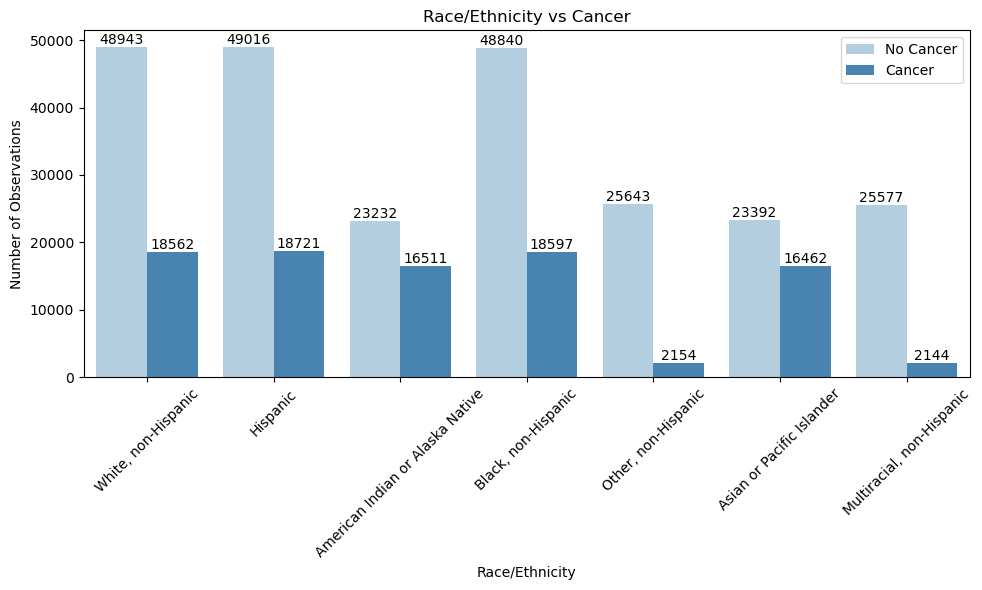

In [59]:
# Assuming you have a DataFrame 'df_sample' with the required data
new_labels = {'no cancer': 'No Cancer', 'cancer': 'Cancer'}

# Set a larger figure size
plt.figure(figsize=(10, 6))

# Visualizing the Race/Ethnicity vs Cancer
eg = sns.countplot(data=race_graph_df, x='Race/Ethnicity', hue='Yes_cancer', palette='Blues')

# Access the legend object
legend = eg.legend()

# Modify the legend labels
legend.get_texts()[0].set_text(new_labels['no cancer'])
legend.get_texts()[1].set_text(new_labels['cancer'])

eg.set_xlabel('Race/Ethnicity')
eg.set_ylabel('Number of Observations')
plt.title('Race/Ethnicity vs Cancer')

# Rotate x-axis labels by 45 degrees
plt.xticks(rotation=45)

# Add count numbers on bars
for p in eg.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()    
    offset = width * 0.02  # Adjust the offset percentage as needed
    eg.annotate(format(height, '.0f'), (x + width / 2., y + height), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Use tight layout
plt.tight_layout()

plt.show()


##### Visual Findings: Race has a relationship with Cancer

Hypothesis 2 - 

* alpha = .05
* H0 = Race has no relationship to cancer  prevalence
* Ha = Race has a relationship to cancer  prevalence
* Outcome: We accept or reject the Null Hypothesis

In [60]:
alpha = 0.05
race_observed = pd.crosstab(sample_train['Yes_cancer'], sample_train['Race/Ethnicity'])
race_observed

Race/Ethnicity,,American Indian or Alaska Native,Asian or Pacific Islander,"Black, non-Hispanic",Hispanic,"Multiracial, non-Hispanic","Other, non-Hispanic","White, non-Hispanic"
Yes_cancer,,,,,,,,
0,88340,13966,13943,29065,29304,15363,15461,29584
1,31539,9916,9886,11183,11299,1262,1295,11037


In [61]:
stats.chi2_contingency(race_observed)

Chi2ContingencyResult(statistic=11451.804831465644, pvalue=0.0, dof=7, expected_freq=array([[87378.79828063, 17407.38962235, 17368.7583666 , 29336.42984341,
        29595.18636782, 12117.82315014, 12213.3079521 , 29608.30641695],
       [32500.20171937,  6474.61037765,  6460.2416334 , 10911.57015659,
        11007.81363218,  4507.17684986,  4542.6920479 , 11012.69358305]]))

In [62]:
chi2, p, degf, expected = stats.chi2_contingency(race_observed)

In [63]:
print('Observed')
print(race_observed.values)
print('\nExpected')
print(expected.astype(int))
print('\n----')
print(f'chi^2 = {chi2:.4f}')
if p < alpha:
    print('We reject the null')
else:
    print("we fail to reject the null")

Observed
[[88340 13966 13943 29065 29304 15363 15461 29584]
 [31539  9916  9886 11183 11299  1262  1295 11037]]

Expected
[[87378 17407 17368 29336 29595 12117 12213 29608]
 [32500  6474  6460 10911 11007  4507  4542 11012]]

----
chi^2 = 11451.8048
We reject the null


#####  Stats Findings: Ha = Race has a relationship to cancer prevalence

## <span style ='color:#241571'>DOES YEAR HAVE A RELATIONSHIP TO CANCER?

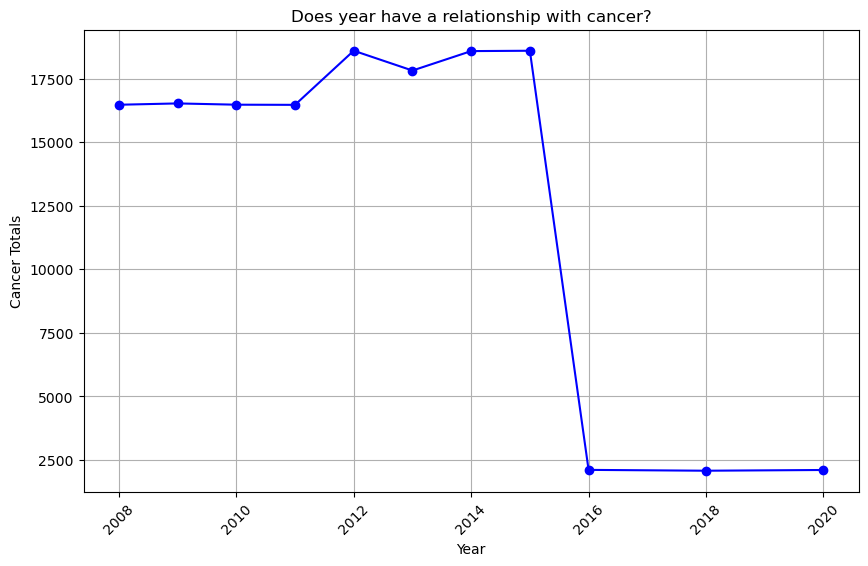

In [64]:
# # Melt the DataFrame to convert 'Year' column into rows

# time_df = df_sample.melt(id_vars='Year', value_vars='Yes_cancer', var_name='CancerCase', value_name='Value')

# # Filter the DataFrame for 'Yes_cancer' values 0 and 1
# filtered_df = time_df[time_df['CancerCase'] == 'Yes_cancer']

# # Create a line plot
# plt.figure(figsize=(10, 6))
# plt.plot(filtered_df[filtered_df['Value'] == 1]['Year'], filtered_df[filtered_df['Value'] == 1]['Value'], marker='o', linestyle='-', color='b', label='Yes_cancer=1')
# plt.plot(filtered_df[filtered_df['Value'] == 0]['Year'], filtered_df[filtered_df['Value'] == 0]['Value'], marker='o', linestyle='-', color='r', label='Yes_cancer=0')
# plt.title('Cancer Cases over the Years')
# plt.xlabel('Year')
# plt.ylabel('Cancer Cases')
# plt.legend()
# plt.grid(True)
# plt.xticks(rotation=45)
# plt.show()

# Filter the DataFrame for rows where 'Yes_cancer' is equal to "1"
filtered_df = df_sample[df_sample['Yes_cancer'] == 1]

# Group by 'Year' and count the number of 'Yes_cancer' occurrences for each year
cancer_totals_by_year = filtered_df.groupby('Year').size()

# Create a time-line graph for the cancer totals over the years
plt.figure(figsize=(10, 6))
plt.plot(cancer_totals_by_year.index, cancer_totals_by_year.values, marker='o', linestyle='-', color='b')
plt.title('Does year have a relationship with cancer?')
plt.xlabel('Year')
plt.ylabel('Cancer Totals')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()



DATA VISUALIZATION FINDINGS :

Both race shows significant relationship to cancer when considering theand gender show relationship to cancer. 
Overall Cancer rates in US, dropped between 2008 and 2016 due to agressive awareness and rampup in breast cancer screening.
1. Prostate, lung, and colorectal cancers are most common in men, accounting for 42% of cases, with prostate cancer alone responsible for nearly 1 in 5 cases.

2. Breast, lung, and colorectal cancers are prevalent in women, comprising half of all cases, with breast cancer accounting for 30% of new cases.

3. Lung cancer death rates declined 48% in men (1990-2016) and 23% in women (2002-2016). Breast cancer death rates declined 40% (1989-2016), while prostate cancer death rates declined 51% (1993-2016). Colorectal cancer death rates fell 53% (1970-2016), but new cases increased in adults under 55 since the mid-1990s.
 
 https://www.nih.gov/news-events/news-releases/annual-report-nation-overall-cancer-mortality-continues-decline
https://www.cancer.org/research/acs-research-news/facts-and-figures-2019.html

## <span style ='color:#241571'>DOES STATE HAVE A RELATIONSHIP TO CANCER?

In [65]:
import folium


map_sample = sample_train.sample(1000)

# Create a folium map centered at the USA
map_usa = folium.Map(location=[37.0902, -95.7129], zoom_start=4)

# Get the count of 'Yes' for each state
yes_count_per_state = map_sample[map_sample['Yes_cancer'] == 1].groupby('State Abbr').size()

# Add markers to the map for each state with cancer values
for idx, row in map_sample.iterrows():
    # Convert 1 to 'Yes' and 0 to 'No'
    cancer_status = 'Yes' if row['Yes_cancer'] == 1 else 'No'
    
    # Get the count of 'Yes' for the current state
    count_for_state = yes_count_per_state.get(row['State Abbr'], 0)
    
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=f"{row['State Abbr']} - Cancer Value: {cancer_status} | Count of 'Yes': {count_for_state}",
        tooltip=row['State Abbr'],
        icon=folium.Icon(icon='info-sign')
    ).add_to(map_usa)

# Display the map
map_usa




In [66]:
#Splitting the data in to X and Y to take out the data with curn and those without 
sample_X_train = sample_train.select_dtypes(exclude=['object']).drop(columns=['Yes_cancer'])
sample_y_train = sample_train.select_dtypes(exclude=['object']).Yes_cancer

sample_X_validate = sample_validate.select_dtypes(exclude=['object']).drop(columns=['Yes_cancer'])
sample_y_validate = sample_validate.select_dtypes(exclude=['object']).Yes_cancer

sample_X_test = sample_test.select_dtypes(exclude=['object']).drop(columns=['Yes_cancer'])
sample_y_test = sample_test.select_dtypes(exclude=['object']).Yes_cancer

# <span style ='color:#241571'> CLASSIFICATION MODELING


###  <span style ='color:#757C88'> BASELINE

In [67]:
(sample_y_train==0).mean()

0.7288916180534234

## <span style ='color:#241571'> TRAIN
### <span style ='color:#757C88'> DECISION TREE

In [68]:
#Make 
sample_tree = DecisionTreeClassifier(max_depth=3, random_state=42)

In [69]:
#Fit
sample_tree = sample_tree.fit(sample_X_train, sample_y_train)

[Text(0.4583333333333333, 0.875, 'Year <= 2009.5\ngini = 0.395\nsamples = 322443\nvalue = [235026, 87417]'),
 Text(0.25, 0.625, 'Longitude <= 37.904\ngini = 0.003\nsamples = 19792\nvalue = [29, 19763]'),
 Text(0.16666666666666666, 0.375, 'Year <= 2008.5\ngini = 0.003\nsamples = 19791\nvalue = [28, 19763]'),
 Text(0.08333333333333333, 0.125, 'gini = 0.0\nsamples = 9860\nvalue = [0, 9860]'),
 Text(0.25, 0.125, 'gini = 0.006\nsamples = 9931\nvalue = [28, 9903]'),
 Text(0.3333333333333333, 0.375, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.6666666666666666, 0.625, 'Year <= 2015.5\ngini = 0.347\nsamples = 302651\nvalue = [234997, 67654]'),
 Text(0.5, 0.375, 'Year <= 2010.5\ngini = 0.455\nsamples = 182321\nvalue = [118482, 63839]'),
 Text(0.4166666666666667, 0.125, 'gini = 0.5\nsamples = 20068\nvalue = [10219, 9849]'),
 Text(0.5833333333333334, 0.125, 'gini = 0.444\nsamples = 162253\nvalue = [108263, 53990]'),
 Text(0.8333333333333334, 0.375, 'Year <= 2016.5\ngini = 0.061\nsamples = 

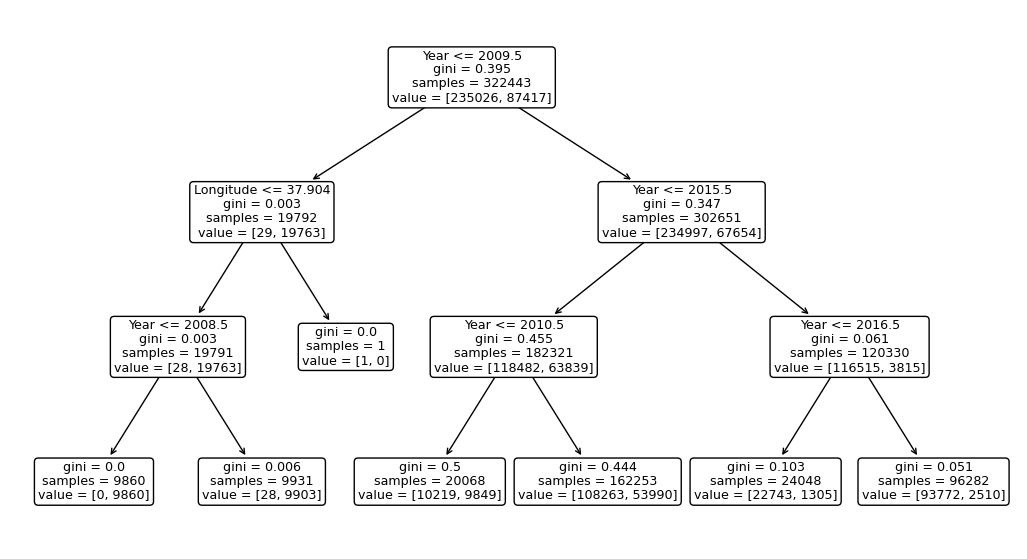

In [70]:
plt.figure(figsize=(13, 7))
plot_tree(sample_tree, feature_names=sample_X_train.columns, rounded=True)

In [71]:
#Dataframe of predictions
cancer_y_prediction = pd.DataFrame({'Cancer': sample_y_train,'Baseline': 0, 'Model_1':sample_tree.predict(sample_X_train)})
cancer_y_prediction.head(3)

,Cancer,Baseline,Model_1
1109113,0,0,0
262456,0,0,0
1128860,1,0,0


In [72]:
y_prediction_prob = sample_tree.predict_proba(sample_X_train)
print(y_prediction_prob[0:5])

[[0.94573353 0.05426647]
 [0.66724806 0.33275194]
 [0.97393075 0.02606925]
 [0.97393075 0.02606925]
 [0.66724806 0.33275194]]


In [73]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
      .format(sample_tree.score(sample_X_train, sample_y_train)))

Accuracy of Decision Tree classifier on training set: 0.79


In [74]:
confusion_matrix(cancer_y_prediction.Cancer, cancer_y_prediction.Model_1)
print(classification_report(cancer_y_prediction.Cancer,cancer_y_prediction.Model_1))

              precision    recall  f1-score   support

           0       0.78      1.00      0.87    235026
           1       1.00      0.23      0.37     87417

    accuracy                           0.79    322443
   macro avg       0.89      0.61      0.62    322443
weighted avg       0.84      0.79      0.74    322443



Decision Tree Model is slightly higher than baseline average in sample data. This model can be used on validation.

###  <span style ='color:#757C88'>LOGISTIC REGRESSION

In [75]:
# Make
log_sample = LogisticRegression(C=1, random_state=42)

In [76]:
#Fit 
log_sample.fit(sample_X_train, sample_y_train)

LogisticRegression(C=1, random_state=42)

In [77]:
# Use
y_prediction = log_sample.predict(sample_X_train)
y_prediction

array([0, 0, 0, ..., 0, 0, 0])

In [78]:
#Dataframe of predictions
cancer_y_prediction.head(3)

,Cancer,Baseline,Model_1
1109113,0,0,0
262456,0,0,0
1128860,1,0,0


In [79]:
cancer_y_prediction['Model_2'] = y_prediction
print('Accuracy of Logistic Regression training set: {:.2f}'
      .format(log_sample.score(sample_X_train, sample_y_train)))

Accuracy of Logistic Regression training set: 0.73


In [80]:
confusion_matrix(cancer_y_prediction.Cancer, cancer_y_prediction.Model_2)
print(classification_report(cancer_y_prediction.Cancer,cancer_y_prediction.Model_2))

              precision    recall  f1-score   support

           0       0.73      1.00      0.84    235026
           1       0.00      0.00      0.00     87417

    accuracy                           0.73    322443
   macro avg       0.36      0.50      0.42    322443
weighted avg       0.53      0.73      0.61    322443



/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


###  <span style ='color:#757C88'>RANDOM FOREST

In [81]:
#Make

rf_sample = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=1,
                            n_estimators=100,
                            max_depth=10, 
                            random_state=42)

In [82]:
#Fit
rf_sample.fit(sample_X_train, sample_y_train)

RandomForestClassifier(max_depth=10, random_state=42)

In [83]:
#Use
rf_sample.score(sample_X_train,sample_y_train)

0.7921989312839789

In [84]:
# now use the model to make predictions
rf_y_prediction = rf_sample.predict(sample_X_train)
rf_y_prediction

array([0, 0, 0, ..., 0, 0, 1])

In [85]:
cancer_y_prediction['Model_3'] = rf_y_prediction

In [86]:
#Dataframe of predictions
cancer_y_prediction.head(3)

,Cancer,Baseline,Model_1,Model_2,Model_3
1109113,0,0,0,0,0
262456,0,0,0,0,0
1128860,1,0,0,0,0


In [87]:
print('Accuracy of Random Forest training set: {:.2f}'
      .format(rf_sample.score(sample_X_train, sample_y_train)))

Accuracy of Random Forest training set: 0.79


In [88]:
confusion_matrix(cancer_y_prediction.Cancer, cancer_y_prediction.Model_3)
print(classification_report(cancer_y_prediction.Cancer,cancer_y_prediction.Model_3))

              precision    recall  f1-score   support

           0       0.78      0.99      0.87    235026
           1       0.89      0.27      0.41     87417

    accuracy                           0.79    322443
   macro avg       0.83      0.63      0.64    322443
weighted avg       0.81      0.79      0.75    322443



## <span style ='color:#241571'>VALIDATE 
### <span style ='color:#757C88'> DECISION TREE

In [89]:
#Dataframe of validate predictions
cancer_y_val_prediction = pd.DataFrame({'Cancer': sample_y_validate,'Baseline': 0, 'Model_1':sample_tree.predict(sample_X_validate)})
cancer_y_val_prediction.head(3)

,Cancer,Baseline,Model_1
242542,0,0,0
357186,0,0,0
284150,0,0,0


In [90]:
cancer_y_val_prediction_prob = sample_tree.predict_proba(sample_X_validate)
print(cancer_y_val_prediction_prob[0:5])

[[0.97393075 0.02606925]
 [0.97393075 0.02606925]
 [0.94573353 0.05426647]
 [0.50921866 0.49078134]
 [0.66724806 0.33275194]]


In [91]:
print('Accuracy of Decision Tree classifier on validation set: {:.2f}'
      .format(sample_tree.score(sample_X_validate, sample_y_validate)))

Accuracy of Decision Tree classifier on validation set: 0.79


In [92]:
confusion_matrix(cancer_y_val_prediction.Cancer, cancer_y_val_prediction.Model_1)

array([[78276,     9],
       [22573,  6624]])

In [93]:
print(classification_report(cancer_y_val_prediction.Cancer,cancer_y_val_prediction.Model_1))

              precision    recall  f1-score   support

           0       0.78      1.00      0.87     78285
           1       1.00      0.23      0.37     29197

    accuracy                           0.79    107482
   macro avg       0.89      0.61      0.62    107482
weighted avg       0.84      0.79      0.74    107482



Findings: Decision Tree Model is  higher than baseline average in validate data. This model can be used on test.

### <span style ='color:#757C88'> LOGISTIC REGRESSION VALIDATE

In [94]:
# USE
cancer_val_y_prediction = log_sample.predict(sample_X_validate)
cancer_val_y_prediction

array([0, 0, 0, ..., 0, 0, 0])

In [95]:
#Dataframe of predictions
cancer_y_val_prediction.head(2)

,Cancer,Baseline,Model_1
242542,0,0,0
357186,0,0,0


In [96]:
cancer_y_val_prediction['Model_2'] = cancer_val_y_prediction
print('Accuracy of Logistic Regression validation set: {:.2f}'
      .format(log_sample.score(sample_X_validate, sample_y_validate)))

Accuracy of Logistic Regression validation set: 0.73


In [97]:
confusion_matrix(cancer_y_val_prediction.Cancer, cancer_y_val_prediction.Model_2)
print(classification_report(cancer_y_val_prediction.Cancer, cancer_y_val_prediction.Model_2))

              precision    recall  f1-score   support

           0       0.73      1.00      0.84     78285
           1       0.00      0.00      0.00     29197

    accuracy                           0.73    107482
   macro avg       0.36      0.50      0.42    107482
weighted avg       0.53      0.73      0.61    107482



/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### <span style ='color:#757C88'> RANDOM FOREST VALIDATE

In [98]:
#score on my train data
rf_sample.score(sample_X_validate,sample_y_validate)

0.7915837070393182

In [99]:
# use the model to make predictions
cancer_val_rf_y_prediction = rf_sample.predict(sample_X_validate)
cancer_y_val_prediction['Model_3'] =cancer_val_rf_y_prediction

In [100]:
cancer_y_val_prediction.head(3)

,Cancer,Baseline,Model_1,Model_2,Model_3
242542,0,0,0,0,0
357186,0,0,0,0,0
284150,0,0,0,0,0


In [101]:
print('Accuracy of Random Forest validation set: {:.2f}'
      .format(rf_sample.score(sample_X_validate, sample_y_validate)))

Accuracy of Random Forest validation set: 0.79


In [102]:
confusion_matrix(cancer_y_val_prediction.Cancer, cancer_y_val_prediction.Model_3)
print(classification_report(cancer_y_val_prediction.Cancer, cancer_y_val_prediction.Model_3))

              precision    recall  f1-score   support

           0       0.78      0.99      0.87     78285
           1       0.88      0.27      0.41     29197

    accuracy                           0.79    107482
   macro avg       0.83      0.63      0.64    107482
weighted avg       0.81      0.79      0.75    107482



###  <span style ='color:#241571'>TOP MODEL SELECTION: DECISION TREE because it is the most consistant Model of 79% and beat the baseline of 73% consistently throughout training and validation datasets. 

## <span style ='color:#241571'>TEST

In [103]:
#Dataframe of validate predictions
cancer_test_prediction = pd.DataFrame({'Cancer': sample_y_test,'Baseline': 0, 'Model_1':sample_tree.predict(sample_X_test)})
cancer_test_prediction.head(3)

,Cancer,Baseline,Model_1
1120696,0,0,0
352881,0,0,0
201701,1,0,0


In [104]:
cancer_test_prediction_prob = sample_tree.predict_proba(sample_X_test)
print(cancer_test_prediction_prob[0:5])

[[0.66724806 0.33275194]
 [0.66724806 0.33275194]
 [0.66724806 0.33275194]
 [0.66724806 0.33275194]
 [0.66724806 0.33275194]]


In [105]:
print('Accuracy of Decision Tree classifier on Test set: {:.2f}'
      .format(sample_tree.score(sample_X_test, sample_y_test)))

Accuracy of Decision Tree classifier on Test set: 0.79


In [106]:
confusion_matrix(cancer_test_prediction.Cancer, cancer_test_prediction.Model_1)
print(classification_report(cancer_test_prediction.Cancer,cancer_test_prediction.Model_1))

              precision    recall  f1-score   support

           0       0.78      1.00      0.87     78224
           1       1.00      0.23      0.37     29258

    accuracy                           0.79    107482
   macro avg       0.89      0.61      0.62    107482
weighted avg       0.84      0.79      0.74    107482



### <span style='color:#241571'>Findings: Decision Tree Test Model performed consitently higher than than baseline of 69%. With all three train, validate and test models. 

In [107]:
cancer_test_prediction.to_csv('Cancer_Predictions.csv',index =False)

## <span style ='color:#241571'> NEXT STEPS
- Time-series if time permits to further explore the drop from 2008-2016.
- Melt Observation data to refine the observations
- Select a few areas to see if there are clusters with cancer data based on Geo Location


##  <span style ='color:#241571'> CONCLUSION  
### There was relationship between Gender, Race/ethnicity, and US Locations and cancer. After performing Decision Tree, Logistic Regression and Random Forest, Decision Tree Model consistently performed better than other Classification models in train, validate and test. Consitiently outperforming the baseling of 73% with an average of 79%. 

##  <span style ='color:#241571'> RECOMMENDATIONS
    

In [108]:
# # Make a copy of 'sample_train' to create 'time_graph_df'
# time_graph_df = sample_train.copy()

# # Convert 'Year' column to datetime format
# time_graph_df['Year'] = pd.to_datetime(time_graph_df['Year'], format='%Y')

#######-----

# time_graph_df.index.dtype

# # Set 'Year' as the index
# time_graph_df.set_index('Year', inplace=True)
# #####
# time_graph_df.head()
#######
# pd.to_datetime(time_graph_df.index, format='%Y')

# import pandas as pd
# import matplotlib.pyplot as plt

# # Assuming you have the yr_df DataFrame with 'Observations' as the column to plot

# # Convert the date strings to datetime objects
# start_date_train = pd.to_datetime('2008-01-01 00:00:00')
# end_date_train = pd.to_datetime('2020-12-31 00:00:00')

# # Ensure the index is unique and sorted in ascending order
# yr_df_sorted = yr_df.sort_index()

# # Select rows within the specified time range for training data
# year_train_human = yr_df_sorted.loc[start_date_train:end_date_train]

# # Plot the 'Observations' for the selected training data
# plt.plot(year_train_human.index, year_train_human['Observations'])

# # Set labels and title
# plt.xlabel('Date')
# plt.ylabel('Observations')
# plt.title('Observations over Time (2008-2020)')

# # Rotate the x-axis labels for better readability (optional)
# plt.xticks(rotation=45)

# # Display the plot
# plt.tight_layout()
# plt.show()
###########



# # Resample the data by year and calculate the count of 'Yes_Cancer' for each year
# yearly_cancer_resampled = df.resample('Y').sum()

# # Create the bar plot
# import seaborn as sns
# import matplotlib.pyplot as plt

# plt.figure(figsize=(10, 6))
# sns.barplot(x=yearly_cancer_resampled.index.year, y='Yes_cancer', data=yearly_cancer_resampled)
# plt.xlabel('Year')
# plt.ylabel('Count')
# plt.title('Counts of Yes_Cancer over the Years')
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()

# index_data_type = df.index.dtype